In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mig
import os


#training on GPU

gpu_=tf.test.gpu_device_name()
tf.device(gpu_)

In [2]:
PATH = '/kaggle/input/pokemonclassification/PokemonData/'
classes = os.listdir(PATH)




c1_path=os.path.join(PATH, classes[1])
c1_data_path=[os.path.join(c1_path, img) for img in os.listdir(c1_path) ]
len(c1_data_path)


for i in range(0,5):
  img = mig.imread(c1_data_path[i])
  
  print(i,img.shape)

0 (169, 166, 3)
1 (353, 350, 3)
2 (360, 391, 3)
3 (407, 425, 3)
4 (191, 183, 3)


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IDG = ImageDataGenerator(rescale = 1./255 )

train_data = IDG.flow_from_directory(PATH,target_size=(256,256),batch_size=8) 


Found 6820 images belonging to 150 classes.


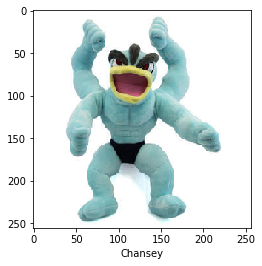

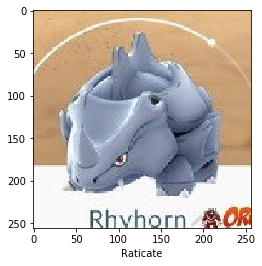

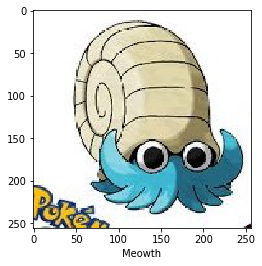

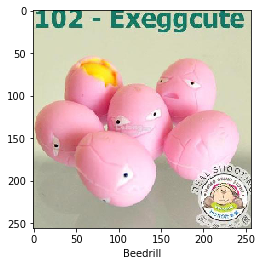

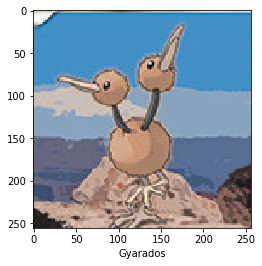

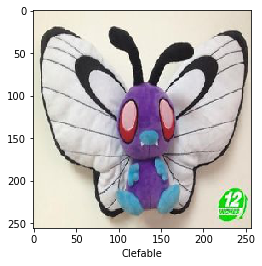

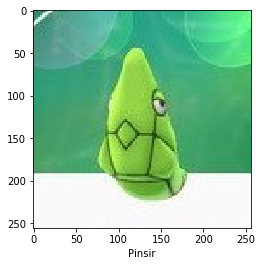

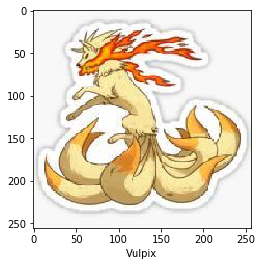

In [4]:
sample_x,sample_y = next(train_data)
for x,y in zip( sample_x,sample_y ):
  plt.imshow(x)
  plt.xlabel(classes[y.argmax()])
  plt.show()

In [5]:
img_shape=(256,256,3)


model = keras.Sequential(name='RGBimg_Classify_Net')
model.add(keras.layers.Conv2D(128,3,input_shape=(img_shape),activation='relu'))
model.add(keras.layers.MaxPool2D())
#model.add(keras.layers.Conv2D(128,3,activation='relu'))
#model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(128,3,strides=(2,2),activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(64,3,strides=(2,2),activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1024,activation='relu'))
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(len(classes),activation='softmax'))


model.summary()

Model: "RGBimg_Classify_Net"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 63, 63, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 128)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 31, 31, 128)       512       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)  

In [6]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.categorical_crossentropy,
             metrics=['accuracy']
             )

hist = model.fit_generator(train_data,epochs=20)

Train for 853 steps
Epoch 1/20
853/853 [==============================] - 478s 561ms/step - loss: 4.6549 - accuracy: 0.0286
Epoch 2/20
853/853 [==============================] - 115s 135ms/step - loss: 3.7744 - accuracy: 0.1324
Epoch 3/20
853/853 [==============================] - 327s 383ms/step - loss: 3.0751 - accuracy: 0.2532
Epoch 4/20
853/853 [==============================] - 53s 62ms/step - loss: 2.3731 - accuracy: 0.4022
Epoch 5/20
853/853 [==============================] - 52s 61ms/step - loss: 1.7871 - accuracy: 0.5305
Epoch 6/20
853/853 [==============================] - 52s 61ms/step - loss: 1.3376 - accuracy: 0.6362
Epoch 7/20
853/853 [==============================] - 52s 61ms/step - loss: 0.9722 - accuracy: 0.7371
Epoch 8/20
853/853 [==============================] - 373s 437ms/step - loss: 0.7936 - accuracy: 0.7780
Epoch 9/20
853/853 [==============================] - 65s 76ms/step - loss: 0.6263 - accuracy: 0.8192
Epoch 10/20
853/853 [==============================] -

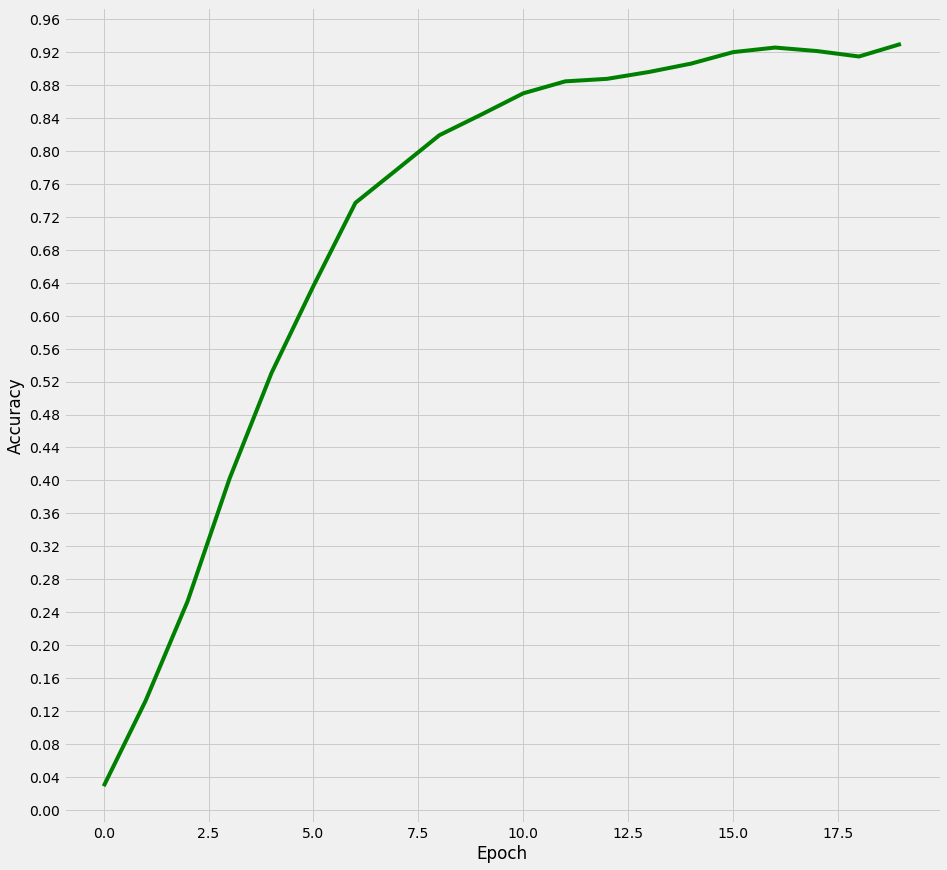

In [7]:

plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,14))
plt.plot(hist.history['accuracy'],label='accuracy',color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.yticks(np.arange(0, 1, step=0.04))
plt.show()

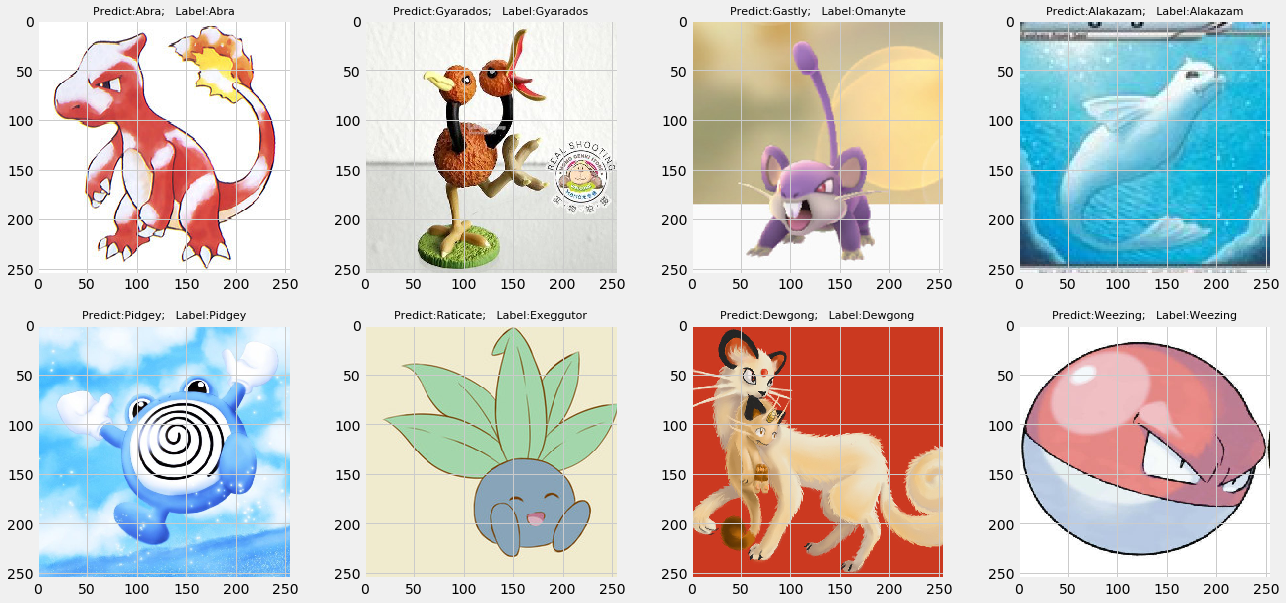

In [8]:
plt.figure(figsize=(20,20))
#for _ in range(3):
sam_x,sam_y = next(train_data) 
pred_ = model.predict(sam_x)
for i in range(len(sam_x)):
    pred,y = pred_[i].argmax(), sam_y[i].argmax()
    plt.subplot(4,4,i+1)
    plt.imshow(sam_x[i])
    title_ = 'Predict:' + str(classes[pred])+ ';   Label:' + str(classes[y])
    plt.title(title_,size=11)
plt.show()